In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
# import seaborn as sns

In [4]:
dataname = "V1_Mouse_Brain_Sagittal_Posterior"
spliz_path = "/oak/stanford/groups/horence/JuliaO/nf-spliz-output/run_dir/visium/V1_Mouse_Brain_Sagittal_Posterior/SpliZ_values/V1_Mouse_Brain_Sagittal_Posterior_sym_SVD_normdonor_S_0.1_z_0.0_b_5_r_0.01_subcol.tsv"

## one row per gene / cell pair

# cell: spot identifier
# gene: gene name
# scZ: SpliZ value
# plot_xcoord: the x coordinate of the spot in the image
# plot_ycoord: the y coordinate of the spot in the image
# pixval: the pixel value from the image at this spot
# pixquant: the pixel quantile from the image at this spot

spliz_df = pd.read_csv(spliz_path,sep="\t")
spliz_df[["cell","gene","scZ","plot_xcoord","plot_ycoord","pixval","pixquant"]]

,cell,gene,scZ,plot_xcoord,plot_ycoord,pixval,pixquant
0,V1_Mouse_Brain_Sagittal_Posterior_GACCAAACGTTG...,Col19a1,-0.421101,8869.0,-8368.0,133.0,4.0
1,V1_Mouse_Brain_Sagittal_Posterior_CGCTGTGTGGAT...,Col19a1,-0.294483,4393.0,-8487.0,131.0,3.0
2,V1_Mouse_Brain_Sagittal_Posterior_AGTATGCTGGAG...,Col19a1,-0.156273,3222.0,-8368.0,135.0,5.0
3,V1_Mouse_Brain_Sagittal_Posterior_GCTGGCATATTC...,Col19a1,-0.037133,3567.0,-5133.0,138.0,6.0
4,V1_Mouse_Brain_Sagittal_Posterior_CGGAAAGAATCA...,Col19a1,-0.097917,4737.0,-8368.0,132.0,3.0
...,...,...,...,...,...,...,...
142588,V1_Mouse_Brain_Sagittal_Posterior_ATCTGACATGGA...,unknown_JH584304.1_0,0.166667,4255.0,-8967.0,132.0,3.0
142589,V1_Mouse_Brain_Sagittal_Posterior_GGGCCATTCGTG...,unknown_JH584304.1_0,0.166667,1914.0,-9685.0,128.0,2.0
142590,V1_Mouse_Brain_Sagittal_Posterior_ATCCCATCCACA...,unknown_JH584304.1_0,0.166667,2396.0,-8847.0,136.0,5.0
142591,V1_Mouse_Brain_Sagittal_Posterior_GGCTGGCTAGCT...,unknown_JH584304.1_0,-0.861111,3429.0,-2736.0,133.0,4.0


In [5]:
spliz_df.groupby("cell")["gene"].nunique()

cell
V1_Mouse_Brain_Sagittal_Posterior_AAACAAGTATCTCCCA    18
V1_Mouse_Brain_Sagittal_Posterior_AAACACCAATAACTGC    69
V1_Mouse_Brain_Sagittal_Posterior_AAACAGAGCGACTCCT    47
V1_Mouse_Brain_Sagittal_Posterior_AAACAGCTTTCAGAAG    39
V1_Mouse_Brain_Sagittal_Posterior_AAACAGGGTCTATATT    30
                                                      ..
V1_Mouse_Brain_Sagittal_Posterior_TTGTTGTGTGTCAAGA    53
V1_Mouse_Brain_Sagittal_Posterior_TTGTTTCACATCCAGG    78
V1_Mouse_Brain_Sagittal_Posterior_TTGTTTCATTAGTCTA    40
V1_Mouse_Brain_Sagittal_Posterior_TTGTTTCCATACAACT    58
V1_Mouse_Brain_Sagittal_Posterior_TTGTTTGTATTACACG     6
Name: gene, Length: 4409, dtype: int64

[]

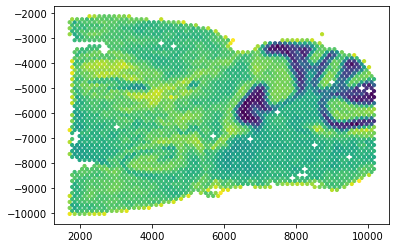

In [14]:
spot_df = spliz_df.drop_duplicates("cell")
plt.scatter(spot_df["plot_xcoord"],spot_df["plot_ycoord"],c=spot_df["pixval"],s=10)
plt.plot()

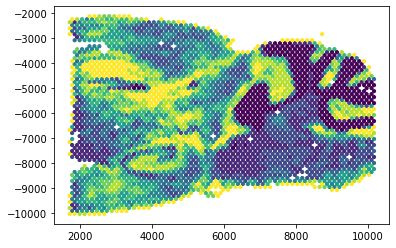

In [17]:
plt.scatter(spot_df["plot_xcoord"],spot_df["plot_ycoord"],c=spot_df["pixquant"],s=10)
plt.show()

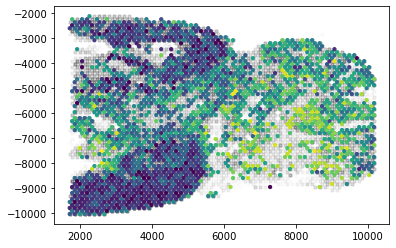

In [26]:
gene = "Myl6"
gene_df = spliz_df[spliz_df["gene"] == gene]
plt.scatter(spliz_df["plot_xcoord"],spliz_df["plot_ycoord"],c="gray",alpha=0.01,s=10)
plt.scatter(gene_df["plot_xcoord"],gene_df["plot_ycoord"],c=gene_df["scZ"],s=10)
plt.savefig("{}_{}.png".format(dataname,gene))
plt.show()

In [ ]:
Rps24